In [1]:
#math and linear algebra stuff
import numpy as np

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
import matplotlib.pyplot as plt
%matplotlib inline

# Second order methods

This notebook intends to give an extremely simple introduction to second order optimization methods.

## Newton method

Newton method is a really simple method originally designed in order to find iteratively the root of a function (where it is zero valued), we will see later some conditions that must be met in order to ensure the algorithm convergence.

One of the first condition is simply to be sure that the function under consideration, for instance $f : \underset{\mathbb{R}^n}{x}\mapsto \underset{\mathbb{R}}{f(x)}$, crosses the X axis of the graph at some point.

The basic idea of newton method is to linearize the function at the current estimate, find the root of the linear approximation, and assign its value to the current estimate before starting a new iteration.

The linear estimation $f_{lin}$ at point $a$, using Taylor serie gives:

\begin{align*}
    f_{lin,a}(x) = f(a) + \langle x-a, \nabla f(a) \rangle
\end{align*}

Where we recall that $\nabla f(a) =
\begin{pmatrix}
\frac{\partial f(a))}{\partial x_0} \\
\frac{\partial f(a)}{\partial x_1} \\
\vdots \\
\frac{\partial f(a)}{\partial x_{n-1}}
\end{pmatrix}$

Now, equating $f_{lin,a}(x)$ to zero leads to:

\begin{align*}
    f_{lin,a}(x) &= 0\\
    f(a) + \langle \nabla f(a),x-a\rangle &= 0\\
    \langle \nabla f(a),x\rangle -\langle \nabla f(a),a\rangle &= -f(a)\\
    \langle \nabla f(a),x\rangle &= \langle \nabla f(a),a\rangle -f(a)
\end{align*}

This simple linear equality defines an hyperplan onto which the current solution can be projected in order to get the next iterate.

Here is a simple overview of the process for a 1D case:

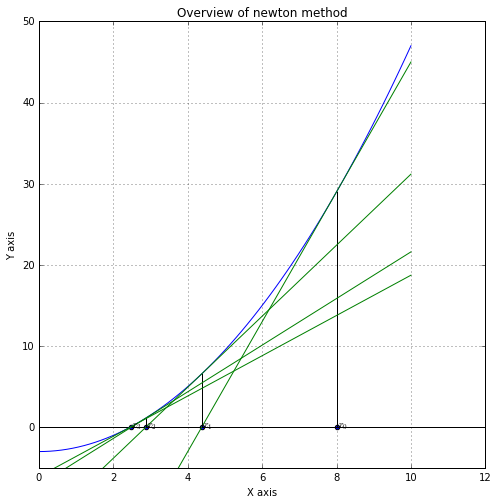

In [3]:
x=np.linspace(-5,10,100)
f = lambda x : 0.5*x**2-3
f1 = lambda x : x
def ftayl(a):
    def fa(x):
        return f(a)+(x-a)*f1(a)
    return fa

fig=plt.figure(0,figsize=(8,8))
ax=fig.add_subplot(111)
plt.title("Overview of newton method")
plt.xlabel('X axis')
plt.ylabel('Y axis')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xlim(0,12)
plt.ylim(-5,50)

#Plot original function
plt.plot(x,f(x))

#Initial estimate
xi = 8

for i in range(4):
    #Plot estimate
    plt.scatter(xi,0)
    plt.plot([xi,xi],[0,f(xi)],'k')
    ax.annotate('$x_'+str(i)+'$',(xi,0))
    #plot linearization in xi
    plt.plot(x,ftayl(xi)(x),'g')
    #Compute next estimate
    xi = xi-f(xi)/f1(xi)

## Extending Newton method for convex optimization

We are generally not really interested in finding the root of an objective function, plus, there is very few chances that we would ever be able to prove it exists.
However, when manipulating functions that are convex and 2 time differentiables, we know, thanks to Fermat theorem, that its derivative vanishes at the optimal point. So finding the root of the derivative of our objective seems to be a much more interesting challenge.

We will replace $f(x)$ by $\nabla f(x)$ in our previous equations to obtain the desired equation update:

\begin{align*}
    f1_{lin,a}(x) &= 0\\
    \nabla f(a) + H_f(a) (x-a) &= 0
\end{align*}

Here we recall that $H_f(a)$ the Hessian of $f$ in $a$ can be defined as  $ H_f(a) = \nabla \nabla f(a) =
\begin{pmatrix}
\frac{\partial f(a))}{\partial x_0 \partial x_0} & \frac{\partial f(a))}{\partial x_1 \partial x_0} & \cdots & \frac{\partial f(a))}{\partial x_{n-1} \partial x_0} \\
\frac{\partial f(a))}{\partial x_0 \partial x_1} & \frac{\partial f(a))}{\partial x_1 \partial x_1} & \cdots & \frac{\partial f(a))}{\partial x_{n-1} \partial x_1} \\
\vdots & \vdots & \vdots & \vdots \\
\frac{\partial f(a))}{\partial x_0 \partial x_{n-1}} & \frac{\partial f(a))}{\partial x_1 \partial x_{n-1}} & \cdots & \frac{\partial f(a))}{\partial x_{n-1} \partial x_{n-1}} \\
\end{pmatrix}$

The equation becomes:

\begin{align*}
    \nabla f(a) + H_f(a) x - H_f(a) a &= 0 \\
    H_f(a) x &= H_f(a) a - \nabla f(a) \\
    x &= H_f^{-1} (H_f(a) a - \nabla f(a)) \\
    x &= a - H_f^{-1} \nabla f(a)
\end{align*}

We can notice that we have to compute $H_f^{-1}$, the inverse of $H_f$. Although $H_f$ is a symmetric matrix, this should be considered as a very difficult task in the general case, especially when dealing with high dimensional problems.

## Second order method in the linear case
For a simple quadratic problem such as the least square minimization, it is very simple to prove that the Newton method converges in only one step, and is equivalent to compute the pseudo inverse. Let's define the following problem:

* $f(x) = \|Ax-b\|_2^2$
* $\nabla f(x) = A^t A x - A^t b$
* $H_f(x) = A^t A$

The newton method can be used on the gradient, because the probem is convex, and two time differentiable. Assuming an initial solution vector $x_0$, the first iterate reads:

\begin{align}
    x_1 &= x_0 - H_f^{-1} \nabla f(x_0)\\
    &= x_0 - (A^t A)^{-1} (A^t A x_0 - A^t b)\\
    &= x_0 - (A^t A)^{-1}A^t A x_0 + (A^t A)^{-1}A^t b\\
    &= (A^t A)^{-1}A^t b \\
    &= A^+
\end{align}

## Low cost Hessian estimation

Newton method is then useless for our least square estimate problem, because it amounts to the pseudo inverse, however, it is interesting to notice that one can use a "low cost" estimation of $H_f^{-1}$ instead of computing the full inverse.
Let's take a closer look at the algorithme update:

\begin{align*}
    x^{k+1} &= x^{k} - H_f^{-1} \nabla f(x^{k})
\end{align*}

We can reformulate this update as a fixed point method:

\begin{align*}
    x^{k} &= x^{k} - H_f^{-1} \nabla f(x^{k})\\
    x^{k} &= T x
\end{align*}

We recall that, from the Picard fixed point theorem, this class of algorithm converges if the operator $T : x \rightarrow x - H_f^{-1} \nabla f(x)$ is a strict contraction. In our least square case, this reduces to an operator norm condition:

The method converges if it exists $\rho \in [0,1[$ such that

\begin{align*}
	  \forall (x,x') \in \mathbb{R}^n \times \mathbb{R}^n, x \neq x' :\quad &\|Tx - Tx'\| \leq \rho \|x-x'\| \\
	  &\|x - H_f^{-1} \nabla f(x) - x' + H_f^{-1} \nabla f(x')\| \leq \rho \|x-x'\| \\
	  &\|x - x' + H_f^{-1} \nabla f (x'-x)\| \leq \rho \|x-x'\| \\
	  &\|(Id - H_f^{-1} \nabla f) (x-x')\| \leq \rho \|x-x'\| \\
	  &\|(Id - H_f^{-1} \nabla f)\| \|(x - x')\| \leq \rho \|x-x'\| \\
	  &\|Id - H_f^{-1} \nabla f\| \leq \rho
\end{align*}

An extremely simple approximation of $H_f^{-1}$ that is easily invertible, and satisfy the above condition is $H_f^{-1}=\frac{1}{\|\nabla f\|} Id$.
This method is a simple instance of the gradient descent.

## Barzilai-Borwein and quasi Newton method

The fact that $H_f^{-1}$ is difficult to compute, give rise to a variety of optimization methods, where this matrix is estimated. Those method are known as quasi-Newton methods.

In the general case, we recall that the second order Taylor expansion of a function $f$ as defined above reads

\begin{align*}
    f(x^{k}+\Delta x)\approx f(x^{k})+ \langle \nabla f(x^{k}),\Delta x \rangle +{\frac {1}{2}}\Delta x^t H_f \Delta x
\end{align*}

Which derivative with respect to $\Delta x$ gives

\begin{align*}
    \nabla f(x^{k}+\Delta x)\approx \nabla f(x^{k}) + H_f \Delta x
\end{align*}

When looking for a $\Delta x$ such that this expression vanishes, we have the Quasi Newton relationship or secant equation:

\begin{align*}
    0 &= \nabla f(x^{k}) + H_f\Delta x\\
    H_f\Delta x &= -\nabla f(x^{k})\\
    \Delta x &= -H_f^{-1} \nabla f(x^{k})
\end{align*}

### Barzilai-Borwein method

In 1988, in "Two-Point Steap Size Gradient Methods", Barzilai and Borwein derived a two point approximation for the secant equation seen earlier that reads

\begin{align*}
    H_f (x^{k+1} - x_k) &= \nabla f(x^{k+1}) -\nabla f(x^{k}) \\
    x^{k+1} - x_k &= -H_f^{-1} ( \nabla f(x^{k+1}) -\nabla f(x^{k}) ) \\
    \Delta x &= -H_f^{-1} \Delta \nabla f(x)
\end{align*}

With $\Delta x = x^{k}-x^{k-1}$ and $\Delta \nabla f(x) = \nabla f(x^{k}) -\nabla f(x^{k-1})$.

Barzilai-Borwein idea is simply to assume that $H_f^{-1}$ writes $\lambda Id$, like in the gradient descent method, and then looks for the $\lambda$ that is close to satisfy their two point Quasi Newton relationship in the least square sense:

\begin{align*}
    \lambda^\star = \underset{\lambda \in \mathbb{R}}{argmin} \quad \| \Delta x +\lambda Id \Delta \nabla f(x) \|_2^2
\end{align*}

Minimizing this simple problem gives:

\begin{align*}
    \lambda^\star = - \frac{\langle \Delta \nabla f(x), \Delta x \rangle}{\langle \Delta \nabla f(x), \Delta \nabla f(x) \rangle}
\end{align*}

The newton method updates, that previously read

\begin{align*}
    x_{new} &= x + \Delta x \\
    x^{k+1} &= x^{k} - H_f^{-1} \nabla f(x^{k})
\end{align*}

Now reads

\begin{align*}
    \Delta x &= x^k - x^{k-1} \\
    \Delta \nabla f(x) &= \nabla f(x^{k}) - \nabla f(x^{k-1}) \\
    x^{k+1} &= x^{k} - \frac{\langle \Delta \nabla f(x), \Delta x \rangle}{\langle \Delta \nabla f(x), \Delta \nabla f(x) \rangle} \nabla f(x^{k})
\end{align*}
